## x_train (pure images from dataset)

20
20
(20, 256, 256, 3)
uint8


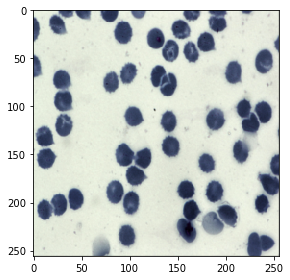

In [1]:

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread, imshow
from tensorflow import keras
data_path = '../input/mydata4'

row = 256
columns = 256

train_data_path = os.path.join(data_path, 'train')
images = os.listdir(train_data_path)
images.sort()

training_images = images[1::2]
training_masks = images[::2] 
print(len(training_images)) #20
print(len(training_masks))
x_train = np.zeros((len(training_images), row, columns, 3), dtype=np.uint8)
index = 0
for x in training_images:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_train[index] = image
    index += 1
print(x_train.shape)
#x_train = x_train / 255
#x_train = x_train.astype('float32')
imshow(x_train[0])
print(x_train.dtype)

# # y_train (pure masks from dataset)

uint8


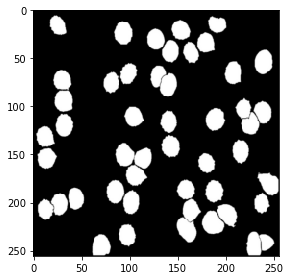

In [2]:

y_train = np.zeros((len(training_masks), row, columns, 3), dtype=np.bool)
#p = os.path.join(train_data_path, training_masks[0])
#i = imread(p)
#k = resize(i, (128, 128))
#imshow(k)

index = 0
for x in training_masks:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
    #image.resize((128,128,1))
    y_train[index] = image
    index += 1
y_train.shape  
type(y_train)
#y_train = y_train / 255
#y_train = y_train.astype('float32')
print(y_train.dtype)
imshow(y_train[0])

# Augmentation

In [3]:
import albumentations as A

transform = A.Compose([
    #A.RandomCrop(width=512, height=512),
    A.HorizontalFlip(p=0.5),
    #A.VerticalFlip(p=1),
    #A.RandomRotate90(p=1),
    A.RandomBrightnessContrast(p=0.5),
    A.Blur(blur_limit=7, always_apply=True, p=1.5),
    A.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5, always_apply=True, p=0.5),
    A.GaussNoise (var_limit=(10.0, 50.0), mean=0, always_apply=True, p=0.5)
])

# aug_x_train (Augmented images from dataset)
# aug_y_train (Augmented masks from dataset)

In [4]:
import os
import numpy as np
from skimage.io import imread, imshow
train_dir = '../input/mydata4/train'
new_images = os.listdir(train_dir)
new_images.sort()
new_training_image = new_images[1::2]
new_training_mask = new_images[::2]
aug_x_train = np.zeros((len(new_training_image), 1200, 1600, 3), dtype=np.uint8)
aug_y_train = np.zeros((len(new_training_mask), 1200, 1600, 3), dtype=np.uint8)
#print(aug_x_train.shape)
count = 0
for x in range(len(new_training_image)):
    image1 = imread(os.path.join(train_dir, new_training_image[x]))  
    mask1 = imread(os.path.join(train_dir, new_training_mask[x]))
    transformed = transform(image=image1, mask=mask1)
    #print(transformed['image'].shape)
    aug_x_train[count] = transformed['image']
    aug_y_train[count] = transformed['mask']
    count += 1
print(aug_x_train.shape)
print(aug_y_train.shape)


(20, 1200, 1600, 3)
(20, 1200, 1600, 3)


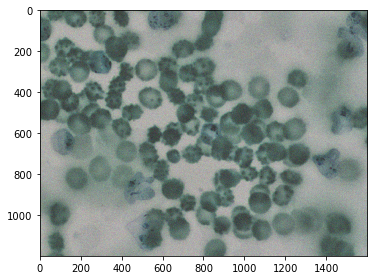

In [5]:
imshow(aug_x_train[19])

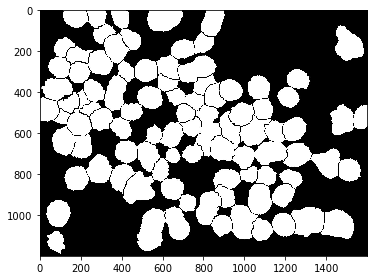

In [6]:
imshow(aug_y_train[19])

# Augmented images + masks saved on cwd for inspection

In [7]:
from skimage.io import imsave
pred_dir = './new_preds'
if not os.path.exists(pred_dir):
    os.mkdir(pred_dir)
for x in range(len(aug_x_train)):
    imsave(os.path.join(pred_dir, '0' + str(x) + '_image' + '.png'), aug_x_train[x])
    imsave(os.path.join(pred_dir, '0' + str(x) + '_mask'  + '.jpg'), aug_y_train[x])
    

In [8]:
meow = os.listdir('./new_preds')
meow.sort()
meow
aug_train_image = meow[::2] 
#new_train
aug_train_mask = meow[1::2]

total_train_images = training_images + aug_train_image
total_train_images

['00a02700-2ea2-4590-9e15-ffc9160fd3de.png',
 '00c8364b-8c85-4502-bcfe-64736fe76815.png',
 '00d04a90-80e5-4bce-9511-1b64eabb7a47.png',
 '0a3b53c7-e7ab-4135-80aa-fd2079d727d6.png',
 '0a747cb3-c720-4572-a661-ab5670a5c42e.png',
 '0a7bfa8a-ee52-4f7a-b9c5-2919ecfa93ef.png',
 '0ab56f9a-846d-49e2-a617-c6cc477fdfad.png',
 '0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.png',
 '0b04ec46-5119-4cda-8c35-c4e5b6f0eed0.png',
 '0b923ab7-ebff-4079-a4bb-af7da89f374e.png',
 '0ca25c88-457f-4f03-bbc1-98fb6663f1d1.png',
 '0ceb4539-5c4c-487d-9826-452a88b5d537.png',
 '0d095f3a-9243-472b-90b4-0ce8309e778c.png',
 '0d098413-6911-4535-b70a-3c3effd8cf49.png',
 '0d2aba33-6920-4001-bd54-59fe0bf9f50e.png',
 '0d3c2521-da55-4df5-bf06-56b3bd4fb2fc.png',
 '0d7bf56f-3b5a-40bd-971c-2ca33dd89b2c.png',
 '0da07970-3146-479c-8a07-f61ed32814a9.png',
 '0dcbf2c9-f959-4703-a72b-f6a81e66c2ea.png',
 '0dcca702-a4ef-4fb3-a940-9c0c140b21c7.png',
 '00_image.png',
 '010_image.png',
 '011_image.png',
 '012_image.png',
 '013_image.png',
 '014_image

In [9]:
total_train_masks = training_masks + aug_train_mask
total_train_masks

['00a02700-2ea2-4590-9e15-ffc9160fd3de.jpg',
 '00c8364b-8c85-4502-bcfe-64736fe76815.jpg',
 '00d04a90-80e5-4bce-9511-1b64eabb7a47.jpg',
 '0a3b53c7-e7ab-4135-80aa-fd2079d727d6.jpg',
 '0a747cb3-c720-4572-a661-ab5670a5c42e.jpg',
 '0a7bfa8a-ee52-4f7a-b9c5-2919ecfa93ef.jpg',
 '0ab56f9a-846d-49e2-a617-c6cc477fdfad.jpg',
 '0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.jpg',
 '0b04ec46-5119-4cda-8c35-c4e5b6f0eed0.jpg',
 '0b923ab7-ebff-4079-a4bb-af7da89f374e.jpg',
 '0ca25c88-457f-4f03-bbc1-98fb6663f1d1.jpg',
 '0ceb4539-5c4c-487d-9826-452a88b5d537.jpg',
 '0d095f3a-9243-472b-90b4-0ce8309e778c.jpg',
 '0d098413-6911-4535-b70a-3c3effd8cf49.jpg',
 '0d2aba33-6920-4001-bd54-59fe0bf9f50e.jpg',
 '0d3c2521-da55-4df5-bf06-56b3bd4fb2fc.jpg',
 '0d7bf56f-3b5a-40bd-971c-2ca33dd89b2c.jpg',
 '0da07970-3146-479c-8a07-f61ed32814a9.jpg',
 '0dcbf2c9-f959-4703-a72b-f6a81e66c2ea.jpg',
 '0dcca702-a4ef-4fb3-a940-9c0c140b21c7.jpg',
 '00_mask.jpg',
 '010_mask.jpg',
 '011_mask.jpg',
 '012_mask.jpg',
 '013_mask.jpg',
 '014_mask.jpg',

# total_x_train (pure images + augmented images)

In [10]:
total_x_train = np.zeros((len(training_images) + len(new_training_image), row, columns, 3), dtype=np.uint8)
t_path = '../input/mydata4/train'
c = 0
d = 0 
for x in total_train_images:
    if c< len(training_images):
        img = imread(os.path.join(t_path, x))
        img = resize(img, (row, columns), mode='constant', preserve_range=True)
        total_x_train[c] = img
        c += 1
    else: 
        #img2 = imread(os.path.join('./new_preds', x))
        #img2 = resize(img2, (512, 512), mode='constant', preserve_range=True)
        #total_x_train[c] = img2
        #c += 1
        total_x_train[c] = resize(aug_x_train[d], (row, columns), mode='constant', preserve_range=True)
        c += 1
        d += 1

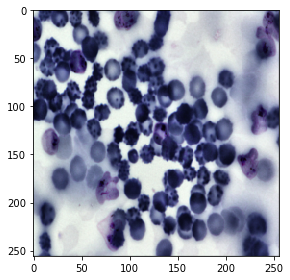

In [11]:
imshow(total_x_train[19])

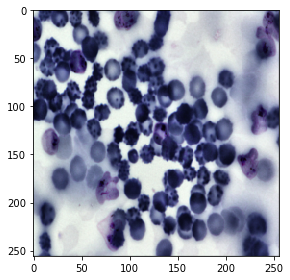

In [12]:
imshow(x_train[19])

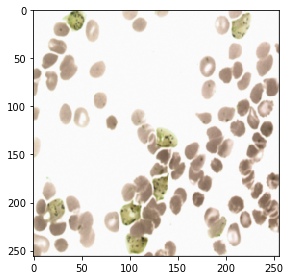

In [13]:
imshow(total_x_train[38])

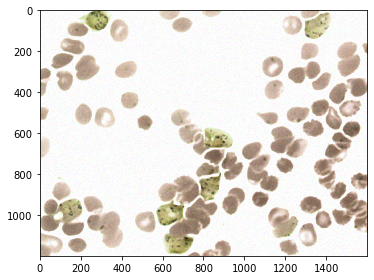

In [14]:
imshow(aug_x_train[18])

# total_y_train (pure masks + augmented masks)

In [15]:
total_y_train = np.zeros((len(training_masks)  + len(new_training_mask), row, columns, 3), dtype=np.uint8)
t_path = '../input/mydata4/train'
c = 0
d = 0 
for x in total_train_masks:
    if c< len(training_masks):
        img = imread(os.path.join(t_path, x))
        img = resize(img, (row, columns), mode='constant', preserve_range=True)
        total_y_train[c] = img
        c += 1
    else: 
        #img2 = imread(os.path.join('./new_preds', x))
        #img2 = resize(img2, (512, 512), mode='constant', preserve_range=True)
        #total_x_train[c] = img2
        #c += 1
        total_y_train[c] = resize(aug_y_train[d], (row, columns), mode='constant', preserve_range=True)
        c += 1
        d += 1

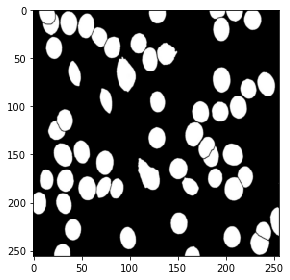

In [16]:
imshow(total_y_train[14])

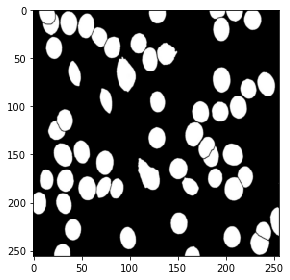

In [17]:
imshow(y_train[14])

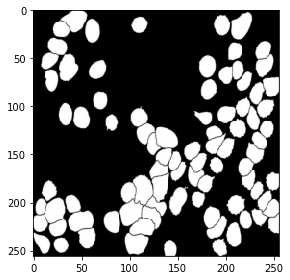

In [18]:
imshow(total_y_train[38])

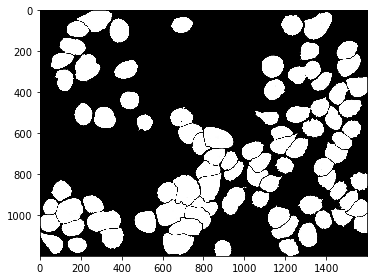

In [19]:
imshow(aug_y_train[18])

In [20]:
print(total_x_train.shape)
print(total_y_train.shape)
print(total_x_train.dtype)
print(total_y_train.dtype)

(40, 256, 256, 3)
(40, 256, 256, 3)
uint8
uint8


# Important

In [21]:
total_y_train = total_y_train.astype('bool')
print(total_y_train.dtype)

bool


In [22]:
''''
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread, imshow
from tensorflow import keras
data_path = '../input/data12'

row = 512
columns = 512

train_data_path = os.path.join(data_path, 'train')
images = os.listdir(train_data_path)
images.sort()

training_images = images[1::2]
training_masks = images[::2] 
print(len(training_images))
print(len(training_masks))
x_train = np.zeros((20, row, columns, 3), dtype=np.uint8)
index = 0
for x in training_images:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_train[index] = image
    index += 1
print(x_train.shape)
#x_train = x_train / 255
#x_train = x_train.astype('float32')
imshow(x_train[0])
print(x_train.dtype)
'''

"'\nimport os\nimport numpy as np\nfrom PIL import Image\nimport matplotlib.pyplot as plt\nimport tensorflow as tf\n%matplotlib inline\nfrom skimage.transform import resize\nfrom skimage.io import imread, imshow\nfrom tensorflow import keras\ndata_path = '../input/data12'\n\nrow = 512\ncolumns = 512\n\ntrain_data_path = os.path.join(data_path, 'train')\nimages = os.listdir(train_data_path)\nimages.sort()\n\ntraining_images = images[1::2]\ntraining_masks = images[::2] \nprint(len(training_images))\nprint(len(training_masks))\nx_train = np.zeros((20, row, columns, 3), dtype=np.uint8)\nindex = 0\nfor x in training_images:\n    path = os.path.join(train_data_path, x)\n    image = imread(path)\n    image = resize(image, (row, columns), mode='constant', preserve_range=True)\n   # image.resize((128,128,1))\n    x_train[index] = image\n    index += 1\nprint(x_train.shape)\n#x_train = x_train / 255\n#x_train = x_train.astype('float32')\nimshow(x_train[0])\nprint(x_train.dtype)\n"

In [23]:
'''
y_train = np.zeros((20, row, columns, 3), dtype=np.uint8)
#p = os.path.join(train_data_path, training_masks[0])
#i = imread(p)
#k = resize(i, (128, 128))
#imshow(k)

index = 0
for x in training_masks:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
    #image.resize((128,128,1))
    y_train[index] = image
    index += 1
y_train.shape  
type(y_train)
#y_train = y_train / 255
#y_train = y_train.astype('float32')
print(y_train.dtype)
imshow(y_train[0])
'''

"\ny_train = np.zeros((20, row, columns, 3), dtype=np.uint8)\n#p = os.path.join(train_data_path, training_masks[0])\n#i = imread(p)\n#k = resize(i, (128, 128))\n#imshow(k)\n\nindex = 0\nfor x in training_masks:\n    path = os.path.join(train_data_path, x)\n    image = imread(path)\n    image = resize(image, (row, columns), mode='constant', preserve_range=True)\n    #image.resize((128,128,1))\n    y_train[index] = image\n    index += 1\ny_train.shape  \ntype(y_train)\n#y_train = y_train / 255\n#y_train = y_train.astype('float32')\nprint(y_train.dtype)\nimshow(y_train[0])\n"

# x_test (Images for prediction)

uint8


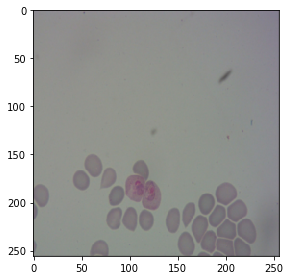

In [24]:
test_data_path = os.path.join(data_path, 'test')
images = os.listdir(test_data_path)
images.sort()
images

testing_images = images[1::2]
testing_masks = images[::2] 

x_test = np.zeros((5, row, columns, 3), dtype=np.uint8)

index = 0
for x in testing_images:
    path = os.path.join(test_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_test[index] = image
    index += 1
x_test.shape  
type(x_test)
#x_test = x_test / 255
#x_test = x_test.astype('float32')
print(x_test.dtype)
imshow(x_test[0])

# y_test (Ground truth for prediction)

/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


float32


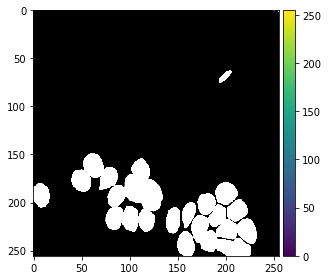

In [25]:
y_test = np.zeros((5, row, columns, 3), dtype=np.float32)

index = 0
for x in testing_masks:
    path = os.path.join(test_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    #image = image/255
    y_test[index] = image
    index += 1
y_test.shape  
y_test.dtype
type(y_test)
#y_test = y_test / 255
#y_test = y_test.astype('float32')
imshow(y_test[0])
print(y_test.dtype)